In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Установка опций отображения
pd.set_option('display.max_columns', None)  # показывать все столбцы
pd.set_option('display.max_rows', None)     # показывать все строки

# Ввод размерности матрицы, количества итераций и шага времени
n = int(input('Введите размерность матрицы --- '))  # размер матрицы
k = int(input('Введите число итераций --- '))       # количество итераций


# Расчет шага по пространству
delta_x = 1 / (n - 1)  # Δx = Δy, равномерная сетка

delta_t = (delta_x**2)*1.0 / 4


# Создание матрицы и установка краевых условий
arr = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        arr[i,j] = 0.5

for i in range(n):
    arr[0, i], arr[i, n - 1] = 1, 1  # краевые условия

for j in range(n):
    arr[j, 0], arr[n-1, j] = 0, 0

arr[0, 0], arr[n - 1, n - 1] = 0.5, 0.5  # угловые условия

# print(arr)

# Итеративное обновление значений матрицы
for _ in range(k):
    # Создаем копию массива для сохранения текущего временного слоя
    new_arr = arr.copy()
    for i in range(1, n - 1):
        for j in range(1, n - 1):
            laplacian = (
                (arr[i - 1, j] - 2 * arr[i, j] + arr[i + 1, j]) / delta_x**2 +
                (arr[i, j - 1] - 2 * arr[i, j] + arr[i, j + 1]) / delta_x**2
            )
            new_arr[i, j] = arr[i, j] + delta_t * laplacian
    arr = new_arr  # Обновляем массив

# print(arr)

# Сохранение данных матрицы в файл
with open('Matrix', 'w') as file_matrix:
    for i in range(n):
        file_matrix.write(" ".join(f"{arr[i, j]:12.7f}" for j in range(n)) + '\n')

print("Размерность матрицы:", n)
print("Число итераций", k)

Размерность матрицы: 30
Число итераций 500


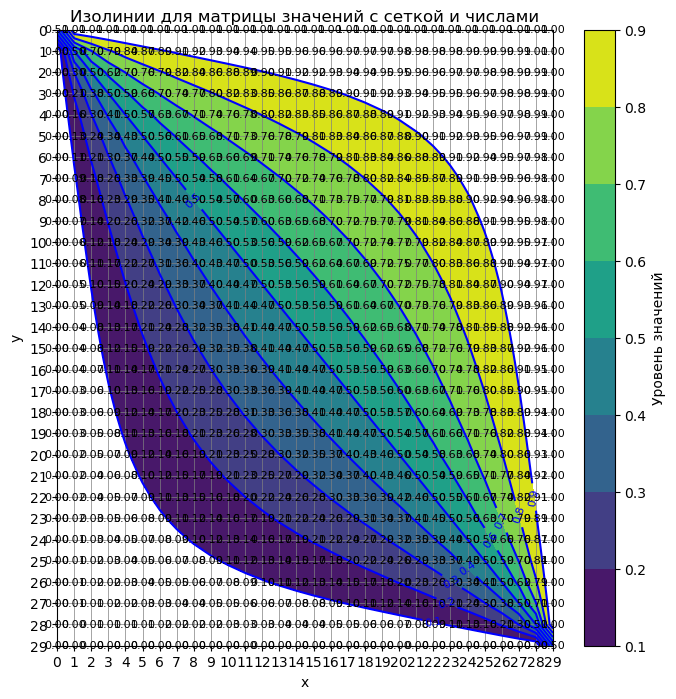

In [4]:
# Построение графика с изолиниями и сеткой
fig, ax = plt.subplots(figsize=(8, 8))

# Добавление цветовой карты и уровней изолиний
contour_levels = np.arange(0.1, 1, 0.1)  # Уровни значений для изолиний
contour_filled = ax.contourf(arr, levels=contour_levels, cmap='viridis')  # Заливка цветом
contours = ax.contour(arr, levels=contour_levels, colors='blue')  # Синие изолинии поверх заливки

# Подписи значений на изолиниях
ax.clabel(contours, inline=True, fontsize=8, colors='blue')

# Добавление цветовой шкалы
cbar = fig.colorbar(contour_filled)
cbar.set_label('Уровень значений')

# Отображение сетки и значений в каждой ячейке
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        ax.text(j, i, f'{arr[i, j]:.2f}', ha='center', va='center', color='black', fontsize=8)

# Включение сетки
ax.set_xticks(np.arange(arr.shape[1]))
ax.set_yticks(np.arange(arr.shape[0]))
ax.grid(color='gray', linestyle='-', linewidth=0.5)

# Оформление графика
ax.set_title('Изолинии для матрицы значений с сеткой и числами')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.gca().invert_yaxis()  # инвертируем ось Y для корректного отображения
plt.show()